<a href="https://colab.research.google.com/github/jferreiraz/ObjectIdentifier/blob/main/ObjectIdentifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [275]:
!pip install pyyaml==5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [276]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [277]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html


In [278]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.7.1+cu101
True


In [279]:
import detectron2

from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import ColorMode, Visualizer

import os
import cv2
from google.colab.patches import cv2_imshow

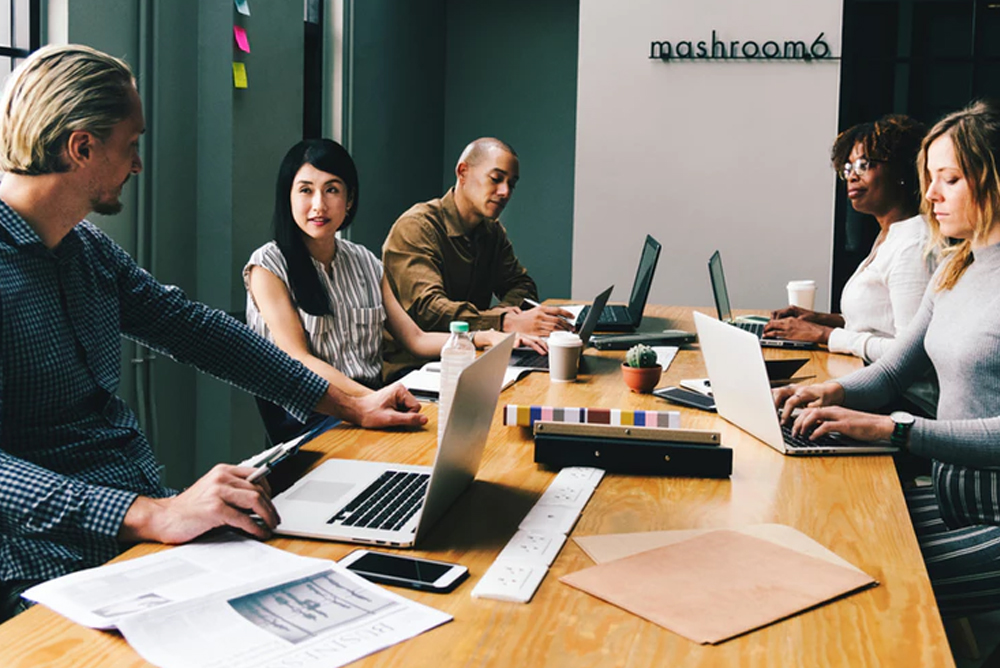

In [280]:
image = cv2.imread("./escritorio.jpg") # Change the image here
cv2_imshow(image)

In [281]:
cfg = get_cfg()

#cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")) #InstanceSegmentation/mask... can be exchange for Detection/faster...
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml") # 101_FPN can be exchanged for 50_FPN, 50_C4, 50_DC5, 101, 101_C4 ...

#cfg.merge_from_file(model_zoo.get_config_file("LVISv0.5-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_1x.yaml")) #The dataset can be changed too, in this line is used LVISv0.5 
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("LVISv0.5-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_1x.yaml")

cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")) 
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml") 


cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6
#cfg.MODEL.DEVICE = "cuda" 

In [282]:
predictor = DefaultPredictor(cfg)
outputs = predictor(image)

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


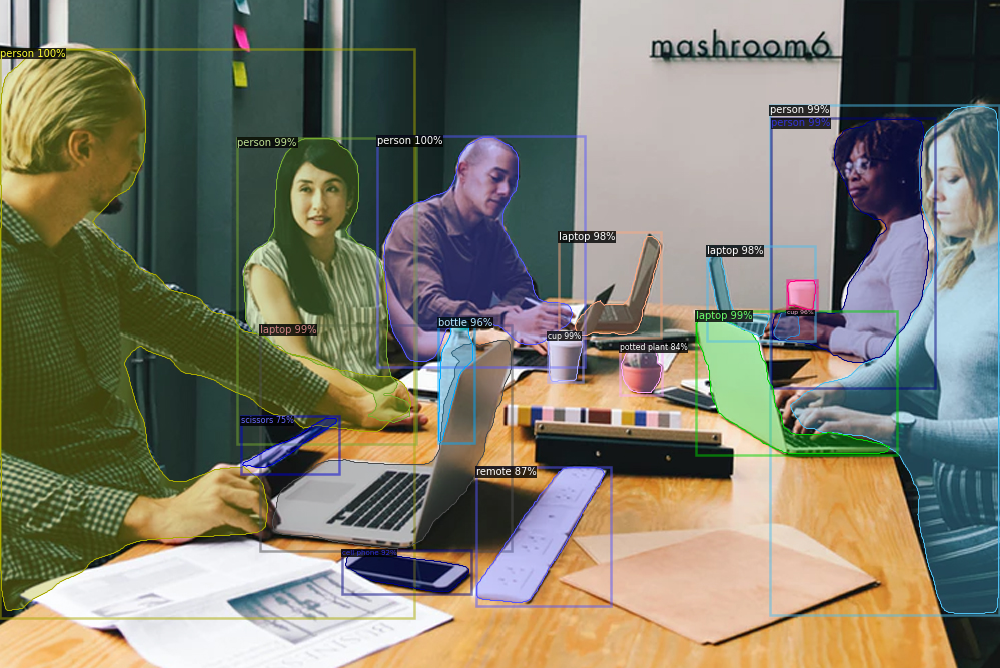

In [283]:
viz = Visualizer(image[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
instance_mode = ColorMode.IMAGE_BW)
output = viz.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(output.get_image()[:,:,::-1])


In [284]:
classes = predictor.metadata.thing_classes
print(classes)

# print(classes.index('cell phone'))

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [285]:
ELEMENT = 'person'       # Change here the element you want to search

ELEMENT_CLASS = classes.index(ELEMENT)

detections = predictor(image)
instances = detections["instances"].to("cpu")
instances = instances[instances.pred_classes == ELEMENT_CLASS]
quantity = len(instances)

print(f"The image have {quantity} {classes[ELEMENT_CLASS]}" )

The image have 5 person


In [286]:
detections = predictor(image)
instances = detections["instances"].to("cpu")
instances = instances.pred_classes
quantity = len(instances)

print(f"the image identified {quantity} different things \n" )
#print(detections)

for identifiedThings in instances:
  print(classes[identifiedThings])

the image identified 16 different things 

person
person
laptop
person
laptop
cup
person
person
laptop
laptop
bottle
cup
cell phone
remote
potted plant
scissors
